In [58]:
# Import libraries
import numpy as np
import pandas as pd
import re
import sklearn
import seaborn as sn
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew 
import statistics
%matplotlib inline

from dateutil.parser import parse
from sklearn.preprocessing import MultiLabelBinarizer

In [59]:
df = pd.read_pickle('datasets/cleaned_steam_games.pkl')

In [60]:
df

,name,all_reviews,release_date,developer,publisher,mature_content,original_price,discount_price,popular_tags_1980s,popular_tags_1990's,...,genre_Racing,genre_Simulation,genre_Software Training,genre_Sports,genre_Strategy,genre_Utilities,genre_Valve,genre_Video Production,genre_Web Publishing,discount_percentage
0,DOOM,92,2016-05-12,id Software,Bethesda Softworks,False,19.99,14.99,0,0,...,0,0,0,0,0,0,0,0,0,25.012506
1,PLAYERUNKNOWN'S BATTLEGROUNDS,49,2017-12-21,PUBG Corporation,PUBG Corporation,True,29.99,29.99,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
2,BATTLETECH,71,2018-04-24,Harebrained Schemes,Paradox Interactive,False,39.99,39.99,0,0,...,0,0,0,0,1,0,0,0,0,0.000000
3,DayZ,61,2018-12-13,Bohemia Interactive,Bohemia Interactive,False,44.99,44.99,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
4,EVE Online,74,2003-05-06,CCP,CCP,False,0.00,0.00,0,0,...,0,0,0,0,1,0,0,0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40557,Grabity,100,2018-05-30,Team Ninja Thumbs,Team Ninja Thumbs,False,0.00,0.00,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
40598,Detached: Non-VR Edition,78,2018-07-24,Anshar Studios,Anshar Studios,False,14.99,14.99,0,0,...,0,1,0,0,0,0,0,0,0,0.000000
40611,A Room Beyond,90,2017-06-13,René Bühling,René Bühling,False,7.99,7.99,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
40728,Chasing the Stars,70,2019-01-23,Ertal Games,Ertal Games,True,9.99,9.99,0,0,...,0,0,0,0,0,0,0,0,0,0.000000


In [61]:
df['release_date'] = df['release_date'].dt.strftime('%Y%m%d').astype(int)

In [62]:
x=df['developer'].isnull().values.sum()
print(x)

x=df['publisher'].isnull().values.sum()
print(x)

#assume null values, publisher == developer

df['publisher'] = df['publisher'].fillna(df['developer'])
df['developer'] = df['developer'].fillna(df['publisher'])

55
493


In [63]:
#null values left
x=df['developer'].isnull().values.sum()
print(x)


39


In [64]:
#just remove
df = df[df['developer'].notna()]

In [65]:
df.loc[:, 'all_reviews'] = df['all_reviews'].astype(int)




C:\Users\Isaac\AppData\Local\Temp\ipykernel_3880\3722702660.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'all_reviews'] = df['all_reviews'].astype(int)


In [66]:
df_all_reviews=df
df = df.drop(['developer', 'publisher','name','all_reviews'], axis=1)


In [67]:
list(df)

['release_date',
 'mature_content',
 'original_price',
 'discount_price',
 'popular_tags_1980s',
 "popular_tags_1990's",
 'popular_tags_2.5D',
 'popular_tags_2D',
 'popular_tags_2D Fighter',
 'popular_tags_360 Video',
 'popular_tags_3D',
 'popular_tags_3D Platformer',
 'popular_tags_3D Vision',
 'popular_tags_4 Player Local',
 'popular_tags_4X',
 'popular_tags_6DOF',
 'popular_tags_ATV',
 'popular_tags_Abstract',
 'popular_tags_Action',
 'popular_tags_Action RPG',
 'popular_tags_Action-Adventure',
 'popular_tags_Addictive',
 'popular_tags_Adventure',
 'popular_tags_Agriculture',
 'popular_tags_Aliens',
 'popular_tags_Alternate History',
 'popular_tags_America',
 'popular_tags_Animation & Modeling',
 'popular_tags_Anime',
 'popular_tags_Arcade',
 'popular_tags_Arena Shooter',
 'popular_tags_Artificial Intelligence',
 'popular_tags_Assassin',
 'popular_tags_Asymmetric VR',
 'popular_tags_Asynchronous Multiplayer',
 'popular_tags_Atmospheric',
 'popular_tags_Audio Production',
 'popular_t

In [68]:
#allpopulartags = games.filter(regex='^popular_tags')
tags=df.filter(regex='^genre')
X = df[['release_date',
 'mature_content',
 'original_price',
 'discount_price',
]]
#list(df)
Y = df_all_reviews[['all_reviews']]

#Double checking the shape
print(X.shape)
print(Y.shape)


(12401, 4)
(12401, 1)


In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42)




In [70]:
#Let's check the shape of the split data as a precaution
print("X_train shape: {}".format(X_train.shape))
print("Y_train shape: {}".format(Y_train.shape))

print("X_test shape: {}".format(X_test.shape))
print("Y_test shape: {}".format(Y_test.shape))

X_train shape: (9300, 4)
Y_train shape: (9300, 1)
X_test shape: (3101, 4)
Y_test shape: (3101, 1)


In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing

model = LinearRegression()

In [72]:
model.fit(X_train,Y_train)

LinearRegression()

In [73]:
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

In [74]:

# model evaluation
print(
  'mean_squared_error : ', mean_squared_error(Y_test, Y_test_pred))
print(
  'mean_absolute_error : ', mean_absolute_error(Y_test, Y_test_pred))

mean_squared_error :  345.0061272060386
mean_absolute_error :  14.755211567336573


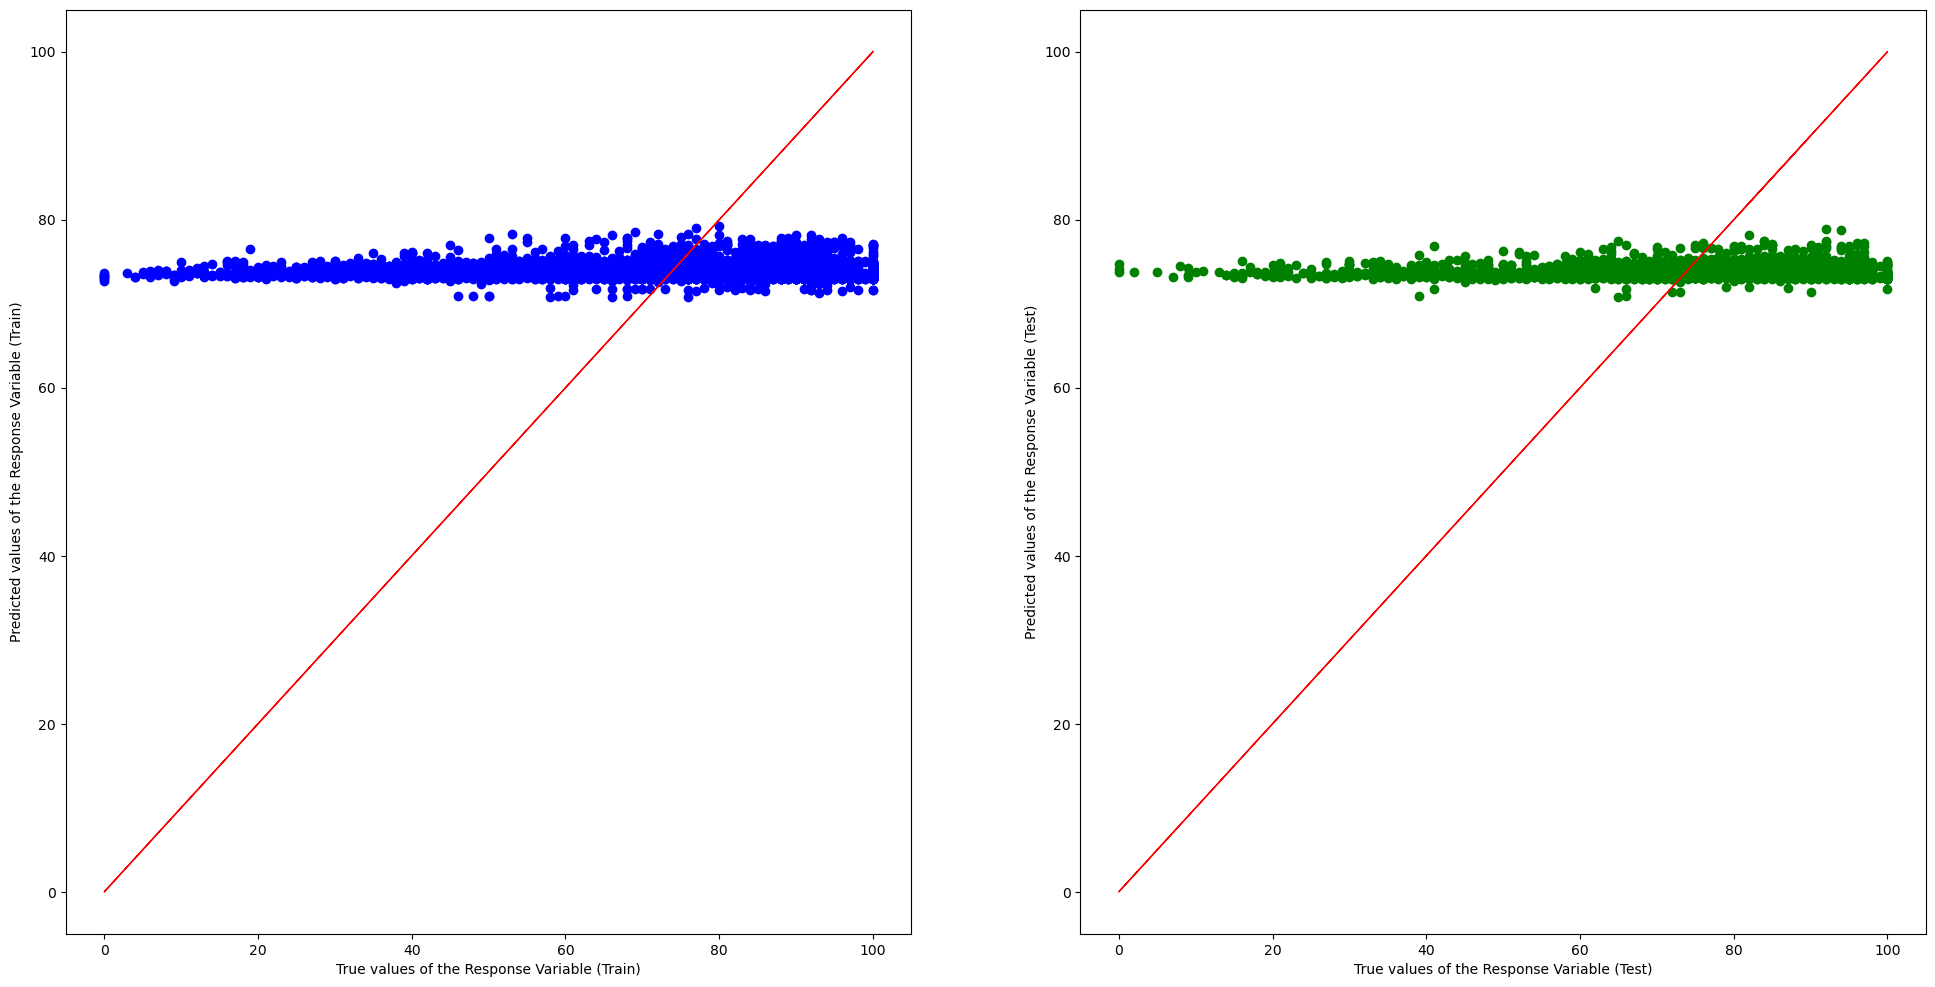

In [77]:
# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(Y_train, Y_train_pred, color = "blue")
axes[0].plot(Y_train, Y_train, 'r-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(Y_test, Y_test_pred, color = "green")
axes[1].plot(Y_test, Y_test, 'r-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [75]:
from sklearn.linear_model import Ridge
 
# Train the model
ridgeR = Ridge(alpha = 1)
ridgeR.fit(X_train, Y_train)
Y_pred = ridgeR.predict(X_test)
 
# calculate mean square error
mean_squared_error_ridge = np.mean((Y_pred - Y_test)**2)
print(mean_squared_error_ridge)

all_reviews    345.006075
dtype: float64


c:\Users\Isaac\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
